<a href="https://colab.research.google.com/github/mberko128/World-Happiness.github.io/blob/main/Copy_of_Final_Project_Berkowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of the factors that contribute to World Happiness

In [ ]:
#clone the github repository
Use_Google_Drive= False #@param {type:"boolean"}

if Use_Google_Drive:
    import os
    from google.colab import drive 

    drive.mount('/content/gdrive',force_remount=True)

    Working_Directory = 'My Drive' #@param {type:"string"}
    wd="/content/gdrive/"+Working_Directory
    os.chdir(wd)

    !git clone https://github.com/mberko128/World-Happiness.github.io
    
    %cd pard187.github.io/
    dirpath = os.getcwd()
    print("current directory is : " + dirpath)

    
else:
    !git clone https://github.com/mberko128/World-Happiness.github.io
    %cd pard187.github.io/

Cloning into 'World-Happiness.github.io'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
[Errno 2] No such file or directory: 'pard187.github.io/'
/content


In [ ]:
#import libraries
import numpy as mp
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from sklearn.preprocessing import StandardScaler

# Part I. Buisness Understanding

The COVID-19 pandemic has brought to light just how important happiness and mental health is in our lives. During times of lockdown, many individuals found themselves struggling with mental health issues and craving the things and activities that bring us most joy. In other words, the pandemic highlighted just how important being happy is for our mental health and forced us to reflect on the specific elements of our lives that bring us happiness.

Everyone wants to live the happiest life they can. For some, social support may be the most important aspect of being happy. For others, happiness may stem from economic success, helping others, or having the freedom and opportunity to do what they wish. Through the data science process, our group will try and decipher what elements foster happiness on a global scale. In other words, we will try to answer the following question: **What are the most influential factors in one’s life to being happy?**

Our analysis has the potential to provide valuable and actionable insights for policymakers and law-makers, whose ultimate goal is to create and implement policies that will best benefit society. In the unprecedented times we have been living in with the pandemic, being happy and having good mental health has never been so important. Our analysis can hopefully shed some light as to whether social networks, financial success, or some other factor may impact happiness the most, which policymakers can use to inspire practices that are most likely to foster happiness among society at large.


# Part II. Data Understanding

In order to gain insight into what factors most influence one’s happiness, we will use a dataset provided by the United Nations entitled World Happiness. The UN reports world happiness data on a yearly basis. This is the most recent dataset on the subject. 

##World Happiness Dataset

The UN uses data collected from the Gallup World Poll, which surveys individuals on main life evaluation questions. The Gallup World Poll  is conducted yearly in at least 153 countries with a random sample of at least 1000 respondents in each country. Participants of the survey were asked how a number of different factors, such as social support and freedom to make life choices, impacted the overall happiness in their lives from 0 to 10, with 10 being the best possible life and 0 being the worst. They are also asked to rate their overall happiness level in their lives, on this same 0 to 10 scale. Other varriables in the dataset were binary survey questions, so respondents answered with either a 0 or 1. The values for these variables are averaged for each country and year. The data collected is based entirely on the survey scores, using the Gallup weights to make the estimates representative. 

There are a total of 11 columns in our dataset: Country name, year, life ladder, Log GDP per capita, social support, healthy life expectancy at birth, freedom to make life choices, generosity, perceptions of corruption, positive affect, and negative affect. The dataset includes data from 153 countries from the years 2006 to 2020. Note that not every country has data from each year from this time frame. The column titles and description are listed below.


Attribute | Data Type | Description |
--- | --- | --- 
Country Name | Nominal | Name of the country
Year | Interval | Describes the year in which data represents
Life Ladder | Ratio | Describes respondents overall life happiness on a scale of 0-10
Log GDP Per Capita | Ratio | Describes the natural log of country's GDP
Social Support | Ratio | Describes the national average of the binary responses (either 0 or 1) to the question <br> “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
Healthy Life Expextancy at Birth | Ratio | The time series of healthy life expectancy at birth constructed based on data from the World Health Organization (WHO) <br> Global Health Observatory data repository, with data available for 2005, 2010, 2015, and 2016. 
Freedom to Make Life Choices | Ratio | National average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose <br> what you do with your life?”
Generosity | Ratio | Describes the residual of regressing the national average of GWP responses to the question “Have you donated money to a <br> charity in the past month?” on GDP per capita.
Perceptions of Corruption | Ratio | Describes the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” <br> and “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of <br> business corruption is used as the overall corruption-perception measure.
Positive affect | Ratio | Desrcibes the average of previous-day affect measures for happiness, laughter, and enjoyment for years 2008 to 2012, and some in 2013
Negative affect | Ratio | Decribes the average of previous-day affect measures for worry, sadness, and anger for all years.



# Part III. Data Preparation

## Access the Dataset

The first step in preparing our data is loading in our dataset.

In [ ]:
#read dataset as csv from github repository
url = "https://github.com/mberko128/World-Happiness.github.io/raw/main/world-happiness-report.csv"
happiness_data = pd.read_csv(url)
happiness_data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


##Subsetting Data



###Dropping Columns

The first step in subsetting our data was removing any unwanted columns. Our analysis is intended to identify what factors contribute the most to happiness, however, we aren't as concerned with how this varies between countries or years. For this reason, we will start by deleting columns 'Country Name' and 'Year'. 

In [ ]:
#Dropping columns 'Country Name' and 'Year'
happiness_data = happiness_data.drop(['Country name', 'year'], axis=1)


Next, we decided to drop the column 'Log GDP per capita'. The reason we chose to drop this column is because it too reflects differences between countries, and our focus is on what makes humans happy unrelated to where they may live. To this end, the variablity among countries may be too large that we wouldn't be able to use it to gain accurate insight into our analysis.

In [ ]:
#Dropping column 'Log GDP per capita'
happiness_data = happiness_data.drop(['Log GDP per capita'], axis=1)

Let's take a look at our updated data frame:

In [ ]:
#Updated Data
happiness_data.head()

,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.724,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,4.402,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,4.758,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,3.832,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,3.783,0.521,52.24,0.531,0.236,0.776,0.710,0.268


###Checking for Null Values

The next step in preparing our data was to check for any null values. The purpose of this is segment is twofold. Firstly, we will identify if any variables require removal from the data set from an extreme number of null values. Secondly, we will remove any remaining null values that may remain among our updated data frame. 

We will start by creating a table to indentify which, if any, columns contain an extreme number of null values.



In [ ]:
#Creating table of column names and respective null values
print(happiness_data.isnull().sum())

Life Ladder                           0
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64


The columns with the highest number of null values are 'Generosity' and 'Perceptions of corruption', with 89 and 110 null values, respectively. Relative to the size of our data, we do not see this as a large enough number to warrant removal of the column. 

Although there aren't enough null values to delete any columns, we still want to remove any null values from the data frame. Let's do that now.

In [ ]:
#Deleting all null values
happiness_data = happiness_data.dropna()

#Ensuring all null values have been deleted


##Overview

Let's review what steps we took to prepare our data for analysis. 

We started by removing columns 'Country name' and 'year'. These columns weren't necessary relevent to our analysis, since we aren't necessarily concerned with how the factors of happiness have changed over time nor how they vary between country. For similar reasoning, we also removed column 'Log GDP per capita'.

Then, we checked to make sure none of our remaining columns had an excessive number of null values. After ensuring the remaining columns were appropriate for our analysis, we removed all remaining null values. 

The final column names and the first five rows of the final data frame can be seen below.



In [ ]:
#Summary of prepared data frame
happiness_data.head()

,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.724,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,4.402,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,4.758,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,3.832,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,3.783,0.521,52.24,0.531,0.236,0.776,0.710,0.268


# Part IV. Modeling and Evaluating

## EDA


###Distributions

The first step in our EDA is to view the distributions for each of the columns in our data frame. 

In [ ]:
#Viewing Distributions
import numpy as np

happiness_data.agg({'Life Ladder':[np.mean, np.median, np.max, np.min],
                  'Social support':[np.mean, np.median, np.max, np.min],
                  'Healthy life expectancy at birth':[np.mean, np.median, np.max, np.min],
                  'Freedom to make life choices':[np.mean, np.median, np.max, np.min],
                  'Generosity':[np.mean, np.median, np.max, np.min],
                  'Perceptions of corruption':[np.mean, np.median, np.max, np.min],
                  'Positive affect':[np.mean, np.median, np.max, np.min],
                  'Negative affect':[np.mean, np.median, np.max, np.min],})

,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
mean,5.44668,0.810321,63.225465,0.739442,-0.000638,0.750996,0.70955,0.269446
median,5.36400,0.835000,65.100000,0.757500,-0.025500,0.806000,0.72200,0.259000
amax,7.97100,0.987000,77.100000,0.985000,0.689000,0.983000,0.94400,0.705000
amin,2.37500,0.290000,32.300000,0.258000,-0.335000,0.035000,0.32200,0.094000


Interestingly, the mean life ladder score is 5.44668, which upon intial reaction is lower than expected. It's also interesting to note that the mean of 'Generosity' was a negative value, meaning donating to charity likely did not have a meaningful impact on happiness. We can take a more in depth look at the distribution of these variables by creating boxplots. 

###Boxplots

The first step in our EDA was to learn more about each of the variables in our dataset. To do this, we created boxplots of each variable. 

Our first boxplot contains the variable 'Life Ladder'. As mentioned in the description table of our variables, 'Life Ladder' is a numeric value on a scale of 0-10 describing survey respondents overall life happiness. 


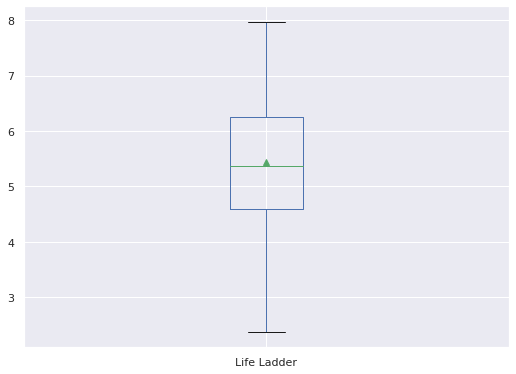

In [ ]:
#Boxplot of 'Life Ladder'
fig, ax = plt.subplots(figsize=(8.7,6.27))
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
happiness_data['Life Ladder'].plot(kind='box', showmeans=True);

Life ladder interquatrile values range from roughly 2.5 to 8. The median and mean of values is just below 5.5. We should also note that there doesn't appear to be extreme outliers. 

Next we will look at 'Social support'

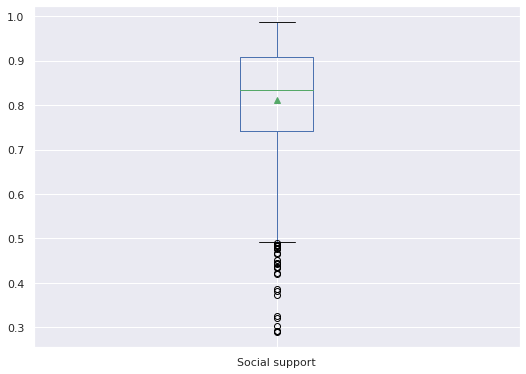

In [ ]:
#Boxplot of 'Social support'
fig, ax = plt.subplots(figsize=(8.7,6.27))
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
happiness_data['Social support'].plot(kind='box', showmeans=True);

The 'Social support' variable is a binary survey answer (either 0 or 1). As reflected by a mean and median value of above 0.8, we note that the majority of survey respondents said they do in fact of someone in their life to count on when they need them. This is not too much of a surprise, and we expect this variable to be quite meaningful to our later prediction of overall happiness.

Next, let's look at a boxplot of the 'Healthy life expectancy at birth' variable.

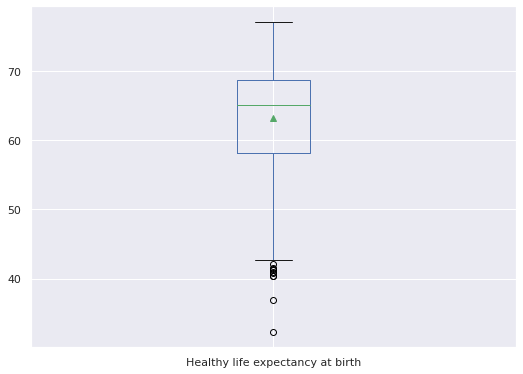

In [ ]:
#Boxplot of 'Healthy life expectancy at birth'
fig, ax = plt.subplots(figsize=(8.7,6.27))
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
happiness_data['Healthy life expectancy at birth'].plot(kind='box', showmeans=True);

As seen above, interquartile values in this variable range from roughly 41 to 77. The median and mean are both roughly 65, with the median being just larger than the mean.

Next, let's look at a boxplot of 'Freedom to make life choices'

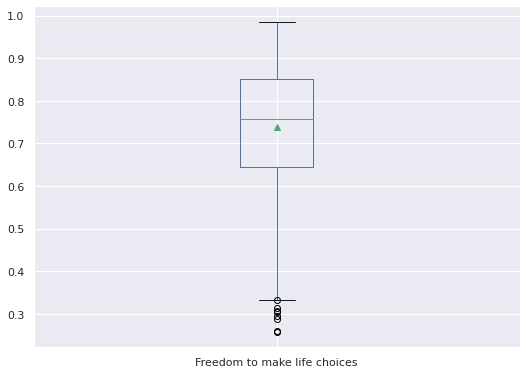

In [ ]:
#Boxplot of 'Freedom to make life choices'
fig, ax = plt.subplots(figsize=(8.7,6.27))
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
happiness_data['Freedom to make life choices'].plot(kind='box', showmeans=True);

This variable was another binary survey response, so values range from 0 to 1. The interquartile range for this variable is roughly .33 to .99. The mean is roughly .73 with the median being slightly higher. This is the distribution we had hoped for, in that it reflects the majority of people answered that they are satisified with their freedom to make life choices. We also expect this variable to be meaningful in predicting overal happiness levels. 

Next, we will look at the distribution of 'Generosity' 

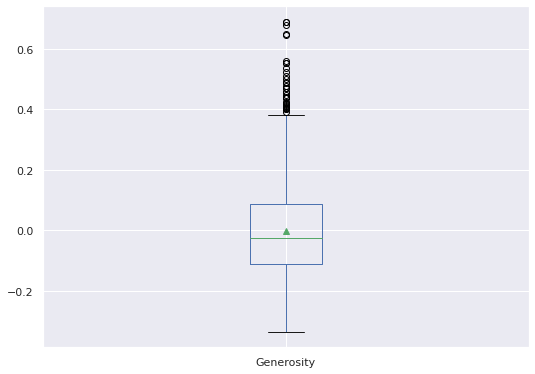

In [ ]:
#Boxplot of 'Generosity'
fig, ax = plt.subplots(figsize=(8.7,6.27))
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
happiness_data['Generosity'].plot(kind='box', showmeans=True);

Interestingly, the mean value of the 'Generosity' variable is right at 0. This reflects the idea that donating to charity had no real effect on happiness levels. This is useful to note before we create our model to predict happiness levels. We will most likely not include this variable in our model. 

Next, we will look at the distribution of 'Perceptions of corruption' variable

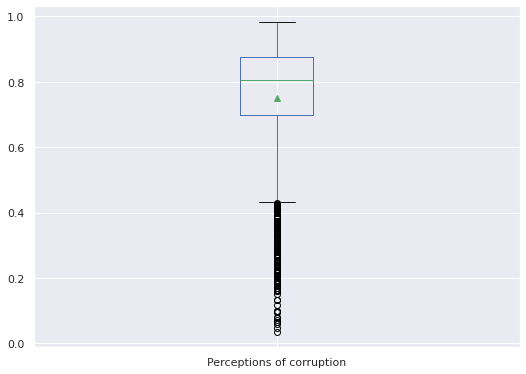

In [ ]:
#Boxplot of 'Perceptions of corruption'
fig, ax = plt.subplots(figsize=(8.7,6.27))
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
happiness_data['Perceptions of corruption'].plot(kind='box', showmeans=True);

This variable also contains binary survey responses (0 or 1). As seen above, this variable appears to contain the most outliers among all our variables. We will certainly keep that in the back of our minds when the time comes to design our machine learning model. The median value for this variable is roughly .8, with a slightly lower mean. 

The next distribution we will take a look at is 'Positive affect'

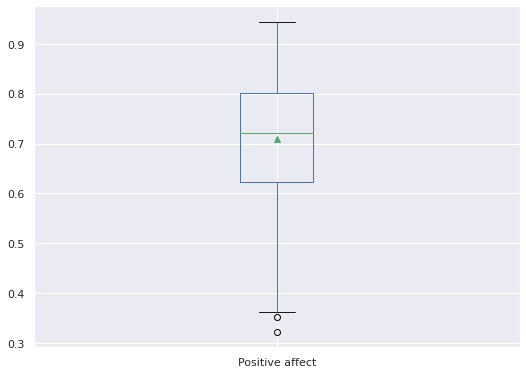

In [ ]:
#Boxplot of 'Positive affect'
fig, ax = plt.subplots(figsize=(8.7,6.27))
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
happiness_data['Positive affect'].plot(kind='box', showmeans=True);

Positive affect is another variable in our data set where survey participants responded with either a 0 or 1. The meean and median are both around .72 and the interquartile range stretches from roughly .36 to .97. With mean and median being well above .5, it's safe to say this variable most likely is a strong contributor to happiness levels.

The last variable in our dataset we will make a boxplot for is 'Negative affect'

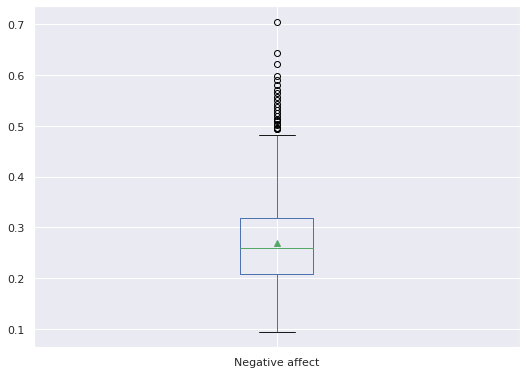

In [ ]:
#Boxplot of 'Negative affect'
fig, ax = plt.subplots(figsize=(8.7,6.27))
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
happiness_data['Negative affect'].plot(kind='box', showmeans=True);

Negative affect, like positive affect, also had survey respondents answer with a 0 or 1. Unlike positive affect, the mean and median of negative affect are below .5. More specifically, the median and mode are roughly .27. From this, we can conclude that negative affect probably won't impact happiness levels as much as positive affect. 



###Correlation

To gain a better sense of what variables in our data set may be correlated to each other, and specifically to life ladder, we constructed a correlation heatmap.

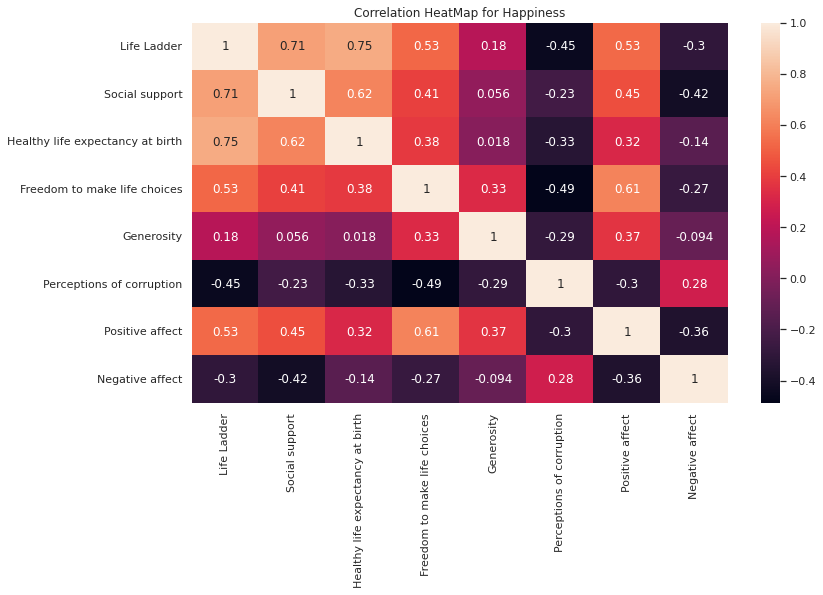

In [ ]:
#get correlations of each features in dataset
corrmat = happiness_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,7))
#plot heat map
g=sns.heatmap(happiness_data[top_corr_features].corr(),annot=True).set_title('Correlation HeatMap for Happiness');


The correlation heatmap from above provides information about the relationships between all the variables we have been looking at thus far. Our main focus is the correlation between Life Ladder, overall happiness on a sale of 0-10, and the other independent variables.
From this heatmap, the most strongly correlated variable with Life Ladder is healthy life expectancy at birth (0.75). This is interesting because there are many more specific variables that are encompassed in life expectancy, that could be driving this relationship. Things like salary, mental health, hometown, and so on. Nonetheless, the better the life expectancy for a person, the more happy they are likely to be.

The second most correlated variable is social support (0.71). This implies that the most important aspect to a person's happiness is having a healthy social circle to rely on.
Freedom to make choices (0.53) and positive affect (0.53) are also both well correlated with life happiness. This makes sense because people who have the freedom to make their own choices as opposed to being told what to do, should mostly be more happy. For positive affect, this is very reasonable because if somebody is happy one day, it is well expected for that to carry over the next day.
Lastly, perceptions of corruption throughout one's government is negatively correlate with a person's happines. This relationship makes sense because governments that are corrupt, or suspected of being corrupt, may not necessarily treat their citizens as well as they should, meaning that the citizens' happiness would be lower than those in places where the government is not as corrupt.

###Scatterplots

The next step in our EDA was making scatterplots. Specifically, we wanted to take a look at the variables that were identified above to have high correlations to 'Life ladder'. We constructed scatterplots of the relationship between the following variables:

- 'Life Ladder' and 'Social Support'
- 'Life Ladder' and 'Healthy Life Expectancy at birth'
- 'Life Ladder' and 'Freedom to make life choices'
- 'Life Ladder' and 'Positive Affect'
- 'Life Ladder' and 'Perceptions of Corruption'

The first scatterplot we will look at is between 'Life Ladder' and 'Social Support'


##Machine Learning Model
